# PERCEPTRON Trick

## 0. GET READY

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. GET DATA

As we are ready to go. At first let's create some classifing data to start our work . As we know without data we are nothing . 

We are going to create data in two format
 
    - from scratch 
    - using sklearn 

### 1. Creating a dataframe file from scratch

Our training data will be in 3 input columns (x0,x1,x2). Output class will be binary(0,1). we are going to create 200 data.

Let's goo......

### Make indiviauls inputs and only output

In [28]:
# start with using random

import random

# 0. samples number 

NUM_SAMPLE=300

# 1.1. create random input values for class 1
x0=np.ones(NUM_SAMPLE,)
x11=np.random.randint(200,290,size=NUM_SAMPLE//2)
x21=np.random.randint(60,98,size=NUM_SAMPLE//2)

# 1.2. create random input values of class 2
x12=np.random.randint(300,400,size=NUM_SAMPLE//2) 
x22=np.random.randint(102,120,size=NUM_SAMPLE//2)

# 2. Create output class values

y1=np.random.randint(0,1,size=NUM_SAMPLE//2)
y2=np.random.randint(1,2,size=NUM_SAMPLE//2)


# 3. Put all things together
x1=np.concatenate([x11,x12])
x2=np.concatenate([x21,x22])
y=np.concatenate([y2,y1])

# 4. Creating DataFrame

data=pd.DataFrame(
   { 'X0': x0,
    'X1': x1/100,
    "X2": x2,
    "output":y}
)

wooho! Our dataframe is ready of being a CSV file

### Look through the dataFrame 

In [29]:
data.sample(5)

,X0,X1,X2,output
11,1.0,2.01,77,1
172,1.0,3.64,115,0
290,1.0,3.49,106,0
126,1.0,2.57,77,1
74,1.0,2.36,89,1


### DataVisualization

As we get our dataframe It's time to visualize the data....

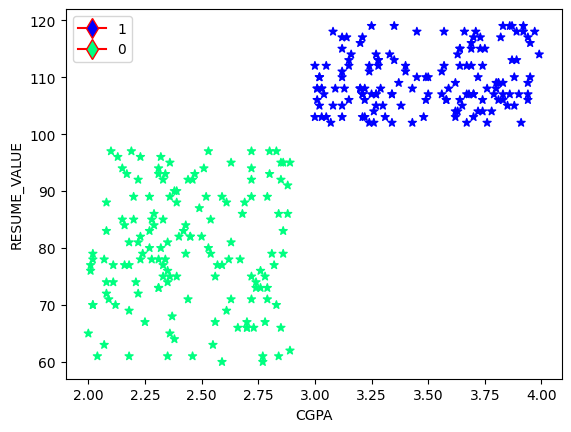

In [30]:
scatter=plt.scatter(data['X1'],data['X2'],c=data['output'],cmap='winter',marker="*")
plt.xlabel("CGPA")
plt.ylabel("RESUME_VALUE")

classes=data['output'].unique()
handles=[plt.Line2D([0],[0],marker='d',color='r',markerfacecolor=scatter.cmap(scatter.norm(i)),markersize=10) for i in range(len(classes))]
plt.legend(handles, classes)

### Save data

We just visualize our data , it's time to save our data into csv file for futher use........

In [31]:
from pathlib import Path

# 0. make the parent folder
root=Path("../data")
root.mkdir(parents=True,
           exist_ok=True)

#. 1. check if data exist or not 

file=root / "student.csv"
if (root / "student.csv").is_file():
    print("file exist")
else:
    print(f"file doesn't exsit have to create file")
    data.to_csv(file,index=False)
    print("And we have done creating file name : ",file)

file exist


### 2. Using **sklearn**

### Get Data
At first get the data by using `make_classification`

In [32]:
# 0. import make_classification from sklearn datasets
from sklearn.datasets import make_classification

# 1. Use the class to store data
X,y=make_classification(n_samples=200,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,
                        class_sep=10)

# 2. add additional feature containg one
x0=np.ones(200,)

# 3. Create ourdata frame

data=pd.DataFrame({
    'X0':x0,
    'X1':X[:,0],
    'X2':X[:,1],
    'output': y
})


wooho our second dataset also ready , it's time to goooo.....

### Looking thorugh dataFrame

In [33]:
data.sample(5)

,X0,X1,X2,output
33,1.0,-2.203004,-0.945577,0
173,1.0,0.218226,1.206597,1
142,1.0,-1.896024,-0.726022,0
171,1.0,-1.313051,1.393942,0
47,1.0,-2.280572,-1.316754,0


It's beautiful it's it ? 

### Visulaization 

Let's visualize our data cause it's perfect time to do so .....

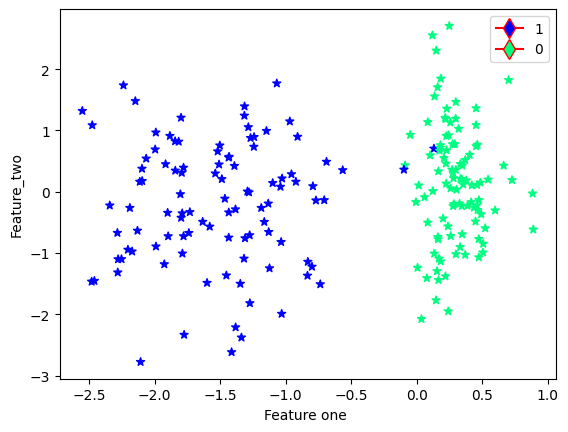

In [34]:
scatter=plt.scatter(data['X1'],data['X2'],c=data['output'],cmap='winter',marker="*")
plt.xlabel("Feature one ")
plt.ylabel("Feature_two")
classes=data['output'].unique()
handles=[plt.Line2D([0],[0],marker='d',color='r',markerfacecolor=scatter.cmap(scatter.norm(i)),markersize=10) for i in range(len(classes))]
plt.legend(handles, classes)

it's Beutiful , woow ..... . 

### Save data to csv

In [47]:
# 0. import Path
from pathlib import Path

# 1. Define root 
root=Path("../data")
root.mkdir(parents=True,
           exist_ok=True)

# 2. Define file
file=root / "classifer.csv"

# 3. creating for checking file existance
if file.exists():
    print("file exist, skipping to create our file")
else:
    print("file don't exist...., let's create one....")
    data.to_csv(file,index=False)
    print("Done creation .....")

file don't exist...., let's create one....
Done creation .....


it's greate , we create our data and saved it perfectly.

It's time to use those data for more exploring...

## Create Model



### 1. Activation `STEP()` Fuction

This fucition will help us to predcit the point's palcement according to the temporary weights

In [36]:
def step(z):
    return 1 if z>0 else 0

### 2. Create `Perceptron` 

This function is going to find the proper weight of classifer which is need to classify our region

In [37]:
from typing import Tuple,List
def perceptron(X:pd.DataFrame,
               y:pd.Series,
               NUM_EPOCH:int = 1000,
               NUM_SAMPLE:int =200 ) -> Tuple[int,List[int]]:
    
    print(f"{X.sample(5)}")
    weights=np.ones(3)
    lr=0.1

    for i in range(NUM_EPOCH):
        j=np.random.randint(0,NUM_SAMPLE)
        y_pred=step(np.dot(X.iloc[j],weights))
        weights = weights +lr*(y[j]-y_pred)*X.iloc[j]
    
    print(f"Let's see the weights: {weights} \n\n Type is {type(weights)}")
    
    return weights[0], weights[1:]

## 3. Fit Data

In [38]:
data

,X0,X1,X2,output
0,1.0,0.461295,0.110563,1
1,1.0,0.492459,-0.366938,1
2,1.0,0.184285,1.846769,1
3,1.0,-1.291250,0.004190,0
4,1.0,-1.990034,0.967729,0
...,...,...,...,...
195,1.0,0.416316,-0.169556,1
196,1.0,-0.096939,0.361036,0
197,1.0,0.134212,-1.009435,1
198,1.0,0.292177,0.777033,1


In [39]:
data=pd.read_csv("data/classifer.csv")
# Divide our data into features and class
features=data.iloc[:,:3]
cls=data.iloc[:,-1]

features.iloc[3]

X0    1.00000
X1   -1.29125
X2    0.00419
Name: 3, dtype: float64

In [40]:
# Divide our data into features and class
features=data.iloc[:,:3]
cls=data.iloc[:,-1]

intercept_,coef_=perceptron(X=features,
                y=cls,
                NUM_EPOCH=1000,
                NUM_SAMPLE=data.shape[0])

print(coef_)
print(intercept_)



      X0        X1        X2
9    1.0  0.228679  0.677952
142  1.0 -1.896024 -0.726022
49   1.0  0.664183  0.426346
155  1.0 -0.734994 -1.509494
195  1.0  0.416316 -0.169556
Let's see the weights: X0    0.200000
X1    1.454170
X2   -0.052176
dtype: float64 

 Type is <class 'pandas.core.series.Series'>
X1    1.454170
X2   -0.052176
dtype: float64
0.20000000000000015


C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\1616121615.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return weights[0], weights[1:]


In [41]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])


C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\1791755636.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=-(coef_[0]/coef_[1])
C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\1791755636.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=-(intercept_/coef_[1])


In [42]:
print(m,c)

27.8703015603678 3.833155270498103


In [43]:
x_input = np.linspace(-100,100,200)
y_input = m*x_input + c



(-3.5, 3.55)

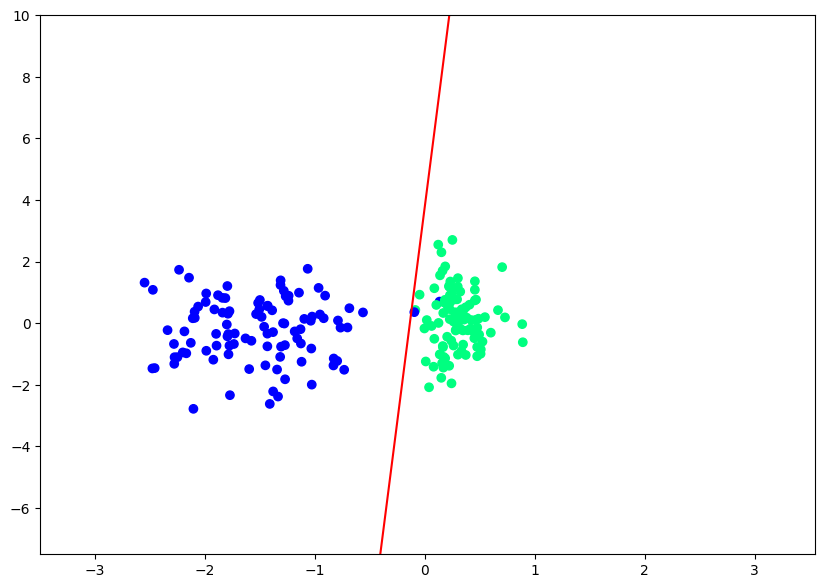

In [44]:
plt.figure(figsize=(10,7))
plt.plot(x_input,y_input,c='red')
plt.scatter(features.iloc[:,1],features.iloc[:,2],c=cls.iloc[:],cmap="winter")
plt.ylim(-7.5,10)
plt.xlim(-3.5,3.55)

In [45]:
from typing import Tuple,List
def perceptron(X:pd.DataFrame,
               y:pd.Series,
               NUM_EPOCH:int = 1000,
               NUM_SAMPLE:int =200 ) -> Tuple[int,List[int]]:
    
    #print(f"{X.sample(5)}")
    weights=X.iloc[0]
    lr=0.1

    for i in range(NUM_EPOCH):
        j=np.random.randint(0,NUM_SAMPLE)
        y_pred=step(np.dot(X.iloc[j],weights))
        # print(f"\n\n y_pred :{y_pred} and  acutal y : {y[j]}")
        # print(weights)
        weights = weights +lr*(y[j]-y_pred)*X.iloc[j]
    
    #print(f"\n\n\nLet's see the weights: {weights} \n\n Type is {type(weights)}")
    
    return weights[0], weights[1:]

In [46]:
data=pd.read_csv("data/student.csv")
# Divide our data into features and class
features=data.iloc[:,:3]
cls=data.iloc[:,-1]

FileNotFoundError: [Errno 2] No such file or directory: 'data/student.csv'

In [ ]:
data.sample(5)

,X0,X1,X2,output
251,1.0,3.01,115,0
223,1.0,3.57,117,0
231,1.0,3.73,111,0
160,1.0,3.38,110,0
4,1.0,2.73,94,1


In [ ]:


intercept_,coef_=perceptron(X=features,
                y=cls,
                NUM_EPOCH=100000,
                NUM_SAMPLE=data.shape[0])

print(coef_)
print(intercept_)

X1   -1.183
X2   -0.100
dtype: float64
13.59999999999997


C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\3973689217.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return weights[0], weights[1:]


In [ ]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])

m,c

C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\970335000.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m=-(coef_[0]/coef_[1])
C:\Users\shafe\AppData\Local\Temp\ipykernel_24108\970335000.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=-(intercept_/coef_[1])


(-11.82999999999516, 135.9999999999434)

In [ ]:
x_input = np.linspace(2,4,200)
y_input = m*x_input + c



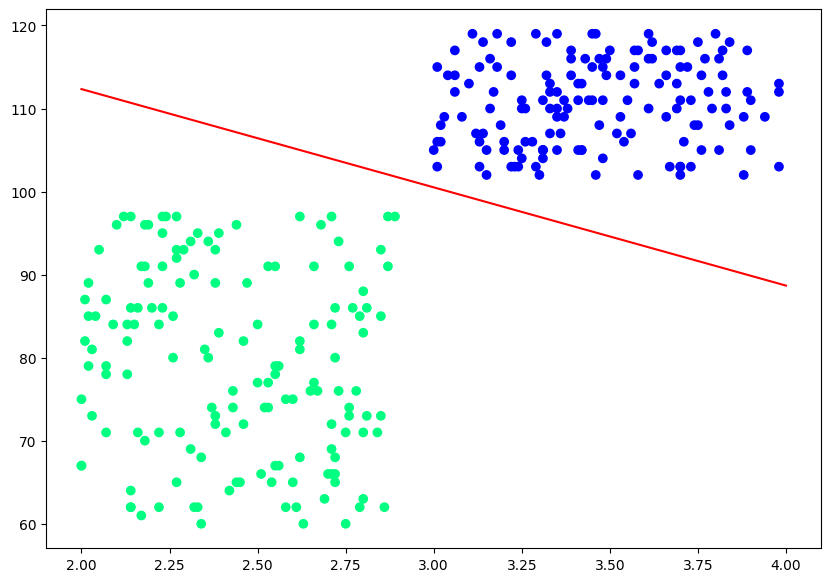

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(x_input,y_input,c='red')
plt.scatter(features.iloc[:,1],features.iloc[:,2],c=cls.iloc[:],cmap="winter")


I have find why ..

But it's failed for our data perfectly when our data is not properly linear but When we use linear data our data  classify perfcectly 